<h1 align = 'center'> PACKAGE IMPORTING </h1>

In [ ]:
%pip install datasist
#import relevant libraries and frameworks
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as plb
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from datasist.structdata import detect_outliers
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import category_encoders as ce
import re 

# Modeling and evaluation 
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (
    BaggingClassifier,
    ExtraTreesClassifier,
    RandomForestClassifier,
    StackingClassifier,
    HistGradientBoostingClassifier
)
from xgboost import XGBClassifier
from sklearn.metrics import classification_report 
import joblib


In [ ]:

# Packages options 
sns.set(rc={'figure.figsize': [14, 7]}, font_scale=1.2) # Standard figure size for all 
np.seterr(divide='ignore', invalid='ignore', over='ignore') ;

import warnings 
warnings.filterwarnings("ignore")

<h1 align = 'center'> LOADING THE DATA (TRAINING AND VALIDATION/TESTING) </h2>

In [2]:
#import data(train and test)
train = pd.read_csv('train.csv', low_memory=False)
test = pd.read_csv('test.csv', low_memory=False)

In [3]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
test.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


<h1 align = 'center'> DESCRIPTIVE STATISTICS </h1>

In [6]:
#check the shape of the train and test data
print(train.shape, test.shape)

(100000, 28) (50000, 27)


#### For the test set all variables are present except the target column

In [7]:
#check the info of the train and test data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [9]:
#check the summary of the train data
train.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [10]:
#check the summary of the train data
test.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,42502.000000,50000.000000,50000.000000,50000.000000,50000.000000,48965.000000,50000.000000,50000.000000
mean,4182.004291,16.838260,22.921480,68.772640,21.052640,30.080200,32.279581,1491.304305
std,3174.109304,116.396848,129.314804,451.602363,14.860397,196.984121,5.106238,8595.647887
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.509652,0.000000
25%,1625.188333,3.000000,4.000000,8.000000,10.000000,4.000000,28.061040,32.222388
50%,3086.305000,6.000000,5.000000,13.000000,18.000000,7.000000,32.280390,74.733349
75%,5934.189094,7.000000,7.000000,20.000000,28.000000,10.000000,36.468591,176.157491
max,15204.633333,1798.000000,1499.000000,5799.000000,67.000000,2593.000000,48.540663,82398.000000


In [11]:
#check for duplicates in the train and test data
train.duplicated().sum(), test.duplicated().sum()

(0, 0)

<h1 align = 'center'> EXPLORATIVE DATA ANALYSIS </h1>

In [12]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [13]:
train.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [14]:
categ_cols = ['Month','Occupation','Credit_Mix','Payment_of_Min_Amount', 'Payment_Behaviour']

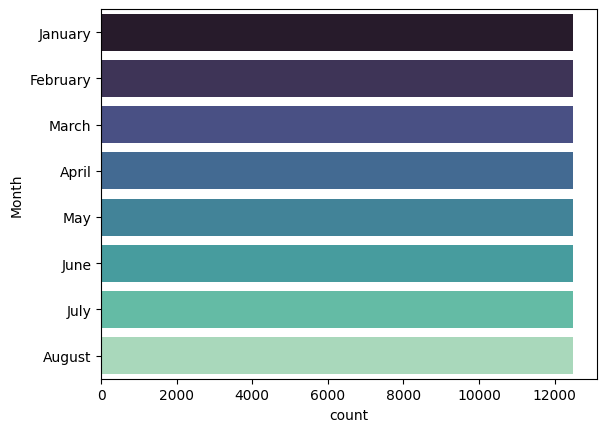

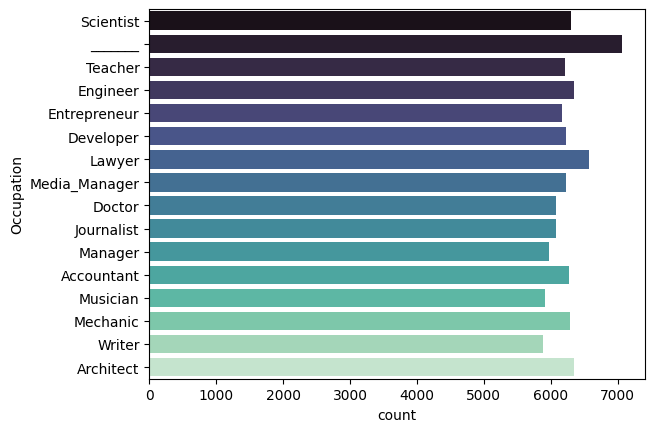

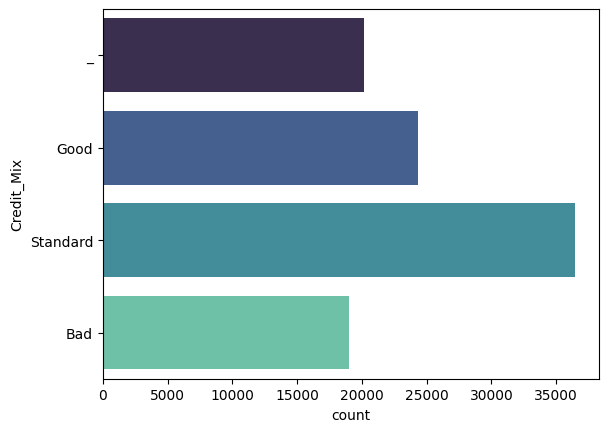

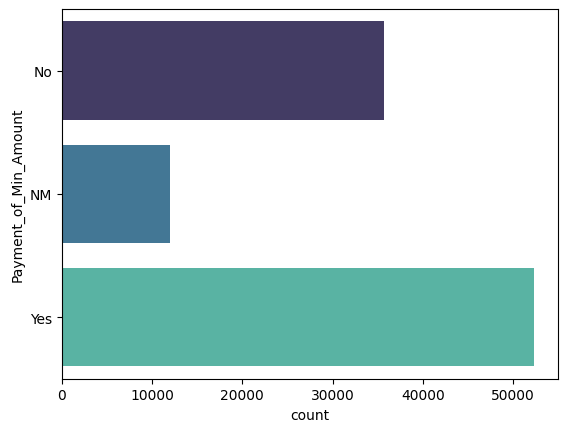

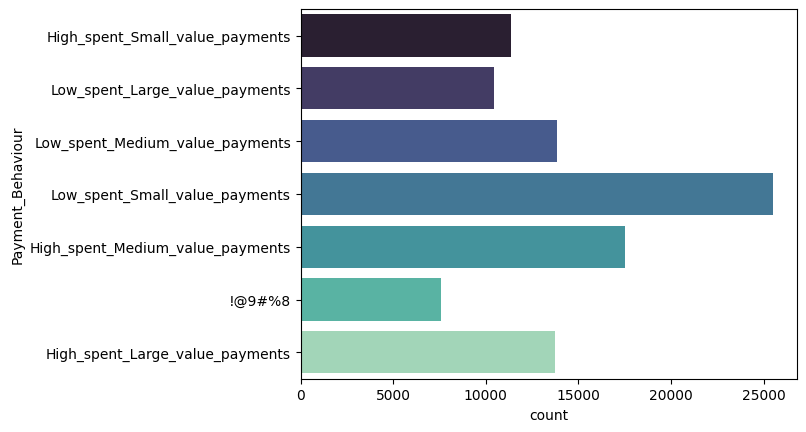

In [15]:
#create a for loop to plot a countplot of all categorical column in the train data
for i in categ_cols:
    sns.countplot(train[i], palette='mako')
    plt.show()

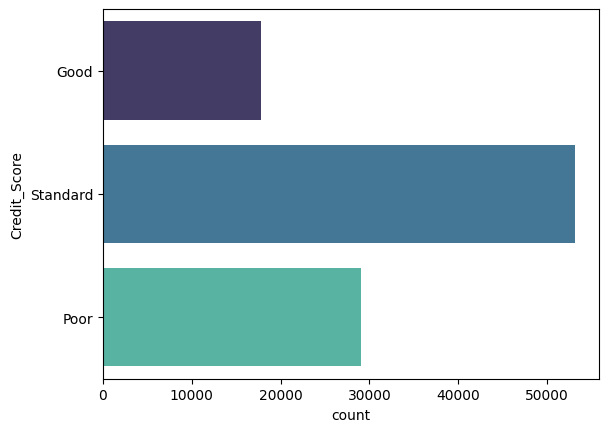

In [16]:
#check the distribution of the target variable
sns.countplot(train['Credit_Score'], palette='mako')
plt.show()

In [17]:
#check the normalized count of the target variable
train['Credit_Score'].value_counts(normalize=True)

Credit_Score
Standard    0.53174
Poor        0.28998
Good        0.17828
Name: proportion, dtype: float64

In [18]:
train.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [19]:
dist_cols = ['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio','Total_EMI_per_month']

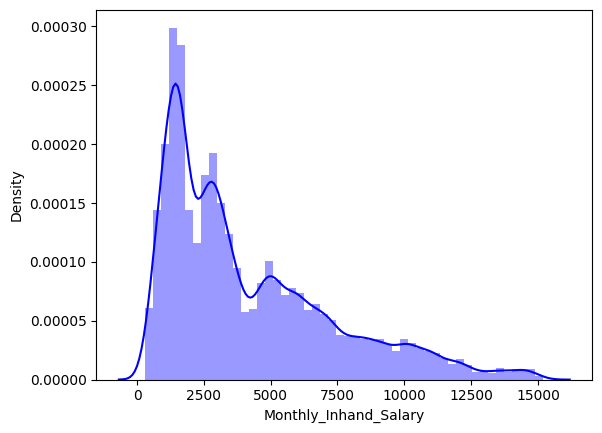

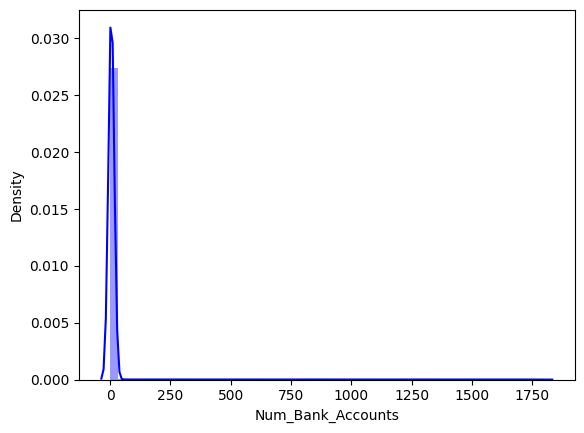

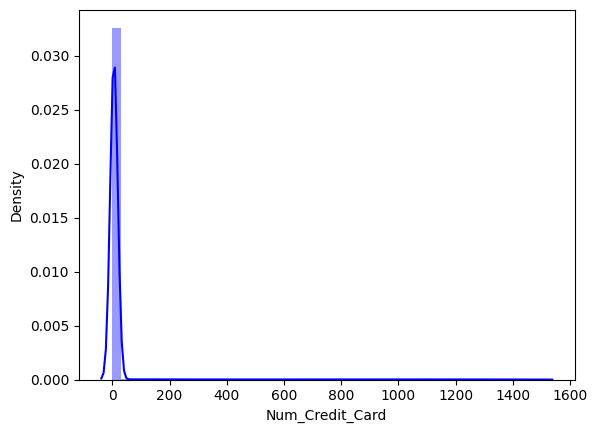

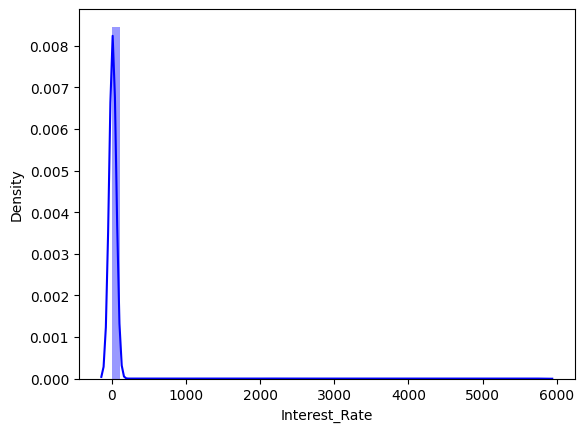

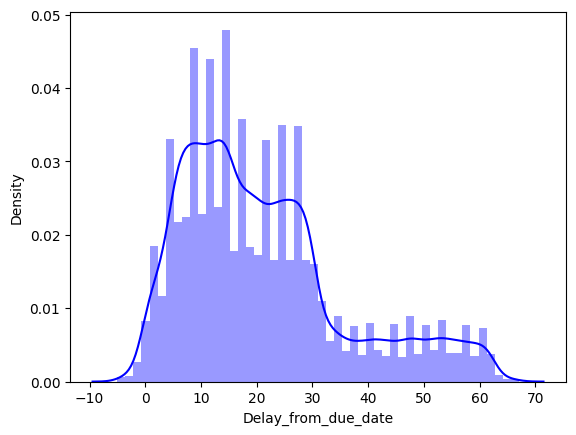

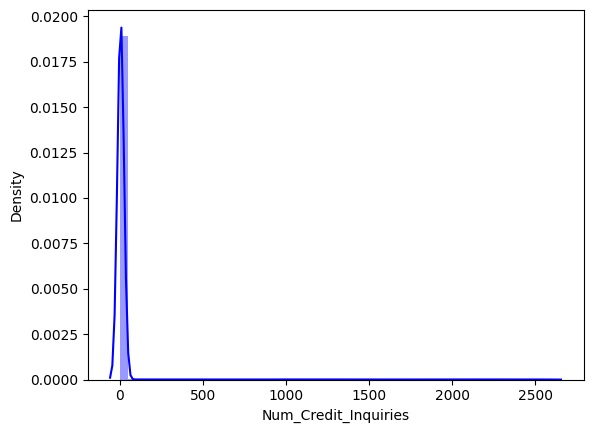

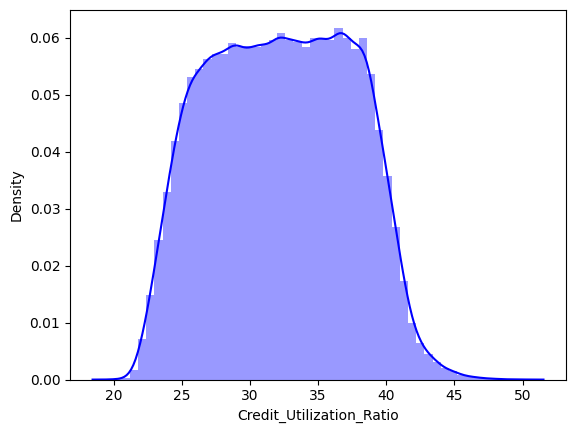

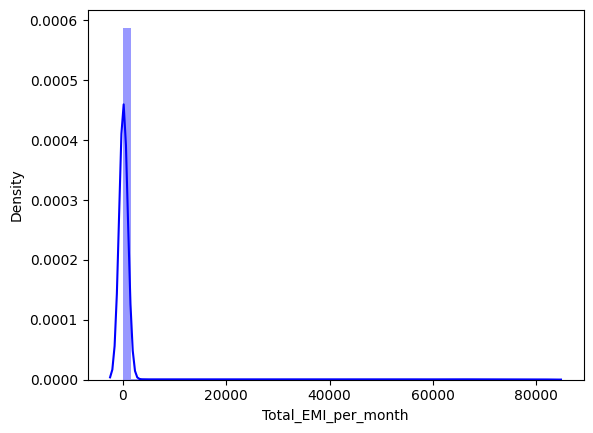

In [20]:
#create a for loop to plot a distplot of all numerical column in the train data
for i in dist_cols:
    sns.distplot(train[i], color='blue')
    plt.show()

In [21]:
#check the number of values in the 'Type_of_Loan' column
train['Type_of_Loan'].value_counts().head(10)

Type_of_Loan
Not Specified                      1408
Credit-Builder Loan                1280
Personal Loan                      1272
Debt Consolidation Loan            1264
Student Loan                       1240
Payday Loan                        1200
Mortgage Loan                      1176
Auto Loan                          1152
Home Equity Loan                   1136
Personal Loan, and Student Loan     320
Name: count, dtype: int64

<h2 align = 'center'> Identify issues </h2>

- ID, Name and SSN (Not useful)
- Age, Annual_Income, Num_of_Loan, Num_of_Delayed_Payment, Changed_Credit_Limit, Amount_invested_monthly, Outstanding_Debt Credit_Mix, Monthly_Balance Numerical but show as catogery (need to be fixed)
- Occupation, CreditMix has value "__"
- Data contains outliers
- Num_Credit_Card has zeros
- Type_of_Loan Need to rewrite as 8 columns
- Num_Bank_Accounts contains negative values
- Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,'Credit_Mix' (needs Feature Engineering)
- Target Columns is Imbalanced
- A lot of missing data

<h1 align = 'center'> Data Preprocessing </h1>

#### Removing the unnecessary columns (Unique Identifier)

In [22]:
del train['ID'] # Identification 
del train['Name'] # Name of client 
del train['SSN'] # SSN (social security number of a person)

In [23]:
train.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3,4,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,February,23,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,March,-500,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,April,23,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


#### Fixing the Numerical Column
- rename in a more better way
- place correct data type

In [24]:
#create a list of column to be renamed and changing the datatype of the column
num_cols_to_fix = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Amount_invested_monthly', 'Outstanding_Debt' , 'Monthly_Balance']

#create function to fix the rename the column 
def fix_nums(num):
    try : 
        return float(num.replace("_",""))
    except :
        return np.nan

#apply the function to the column and make a for loop to apply the function to all the columns in the list
for col in num_cols_to_fix :
    train[col] = train[col].apply(fix_nums)

In [25]:
#recheck the dataset
train.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,CUS_0xd40,February,23.0,Scientist,19114.12,NaN,3,4,3,4.0,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,CUS_0xd40,March,-500.0,Scientist,19114.12,NaN,3,4,3,4.0,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,CUS_0xd40,April,23.0,Scientist,19114.12,NaN,3,4,3,4.0,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,CUS_0xd40,May,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


#### Reset the type of Loan

In [26]:
## Rebuild Type of loans Columns 
for i in train['Type_of_Loan'].value_counts().head(9).index[1:] : 
    train[i] = train['Type_of_Loan'].str.contains(i)

#drop the 'Type_of_Loan' column
del train['Type_of_Loan']

In [27]:
#recheck the dataset
train.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Monthly_Balance,Credit_Score,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
0,CUS_0xd40,January,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,312.494089,Good,True,True,False,False,False,False,True,True
1,CUS_0xd40,February,23.0,Scientist,19114.12,NaN,3,4,3,4.0,...,284.629162,Good,True,True,False,False,False,False,True,True
2,CUS_0xd40,March,-500.0,Scientist,19114.12,NaN,3,4,3,4.0,...,331.209863,Good,True,True,False,False,False,False,True,True
3,CUS_0xd40,April,23.0,Scientist,19114.12,NaN,3,4,3,4.0,...,223.451310,Good,True,True,False,False,False,False,True,True
4,CUS_0xd40,May,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,341.489231,Good,True,True,False,False,False,False,True,True


#### Num Bank Accounts

In [28]:
#apply a lambda function to the Num Bank Accounts column to change the negative values to positive values
train['Num_Bank_Accounts'] = train['Num_Bank_Accounts'].apply(lambda x :abs (x))

#### resizing the type of credit card column

In [29]:
train['Num_Credit_Card'].replace(0,1,inplace=True)

#### convert credit_history_age to months age

In [30]:
#create a function to convert the age column to months
def History_age(age):
    try : 
        years = int("".join(re.findall('[0-9]',''.join(age.split("and")[0]))))
        month = int("".join(re.findall('[0-9]',''.join(age.split("and")[1]))))
        return years*12 + month
    except :
        return np.nan
#apply the function to the column
train['Credit_History_Age'] = train['Credit_History_Age'].apply(History_age)

#### Binary categorizing of Payment_Min_Amount column

In [31]:
train['Payment_of_Min_Amount'].replace("NM","No",inplace=True)

In [32]:
train['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    52326
No     47674
Name: count, dtype: int64

#### Removing the error in the Payment_Behaviour column

In [33]:
train['Payment_Behaviour']= train['Payment_Behaviour'].replace("!@9#%8",np.nan)
train['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Name: count, dtype: int64

#### Imputation of the Occupation Column

In [34]:
train['Occupation'].value_counts()

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

In [35]:
occs = train['Occupation'].value_counts().index[1:]
occs

Index(['Lawyer', 'Architect', 'Engineer', 'Scientist', 'Mechanic',
       'Accountant', 'Developer', 'Media_Manager', 'Teacher', 'Entrepreneur',
       'Doctor', 'Journalist', 'Manager', 'Musician', 'Writer'],
      dtype='object', name='Occupation')

In [36]:
#further cleaning of the Occupation column
id_ = "CUS_0xb891"
oc = train[train['Customer_ID'] == id_]['Occupation'].mode()[0]
train[train['Customer_ID'] == id_].replace("_______",oc)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Monthly_Balance,Credit_Score,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
24,CUS_0xb891,January,54.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,...,433.604773,Standard,False,False,False,False,False,False,False,False
25,CUS_0xb891,February,54.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,...,409.951812,Standard,False,False,False,False,False,False,False,False
26,CUS_0xb891,March,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,...,411.427123,Standard,False,False,False,False,False,False,False,False
27,CUS_0xb891,April,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,...,262.499594,Standard,False,False,False,False,False,False,False,False
28,CUS_0xb891,May,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,...,359.374916,Standard,False,False,False,False,False,False,False,False
29,CUS_0xb891,June,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,...,419.880784,Standard,False,False,False,False,False,False,False,False
30,CUS_0xb891,July,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,...,443.549957,Standard,False,False,False,False,False,False,False,False
31,CUS_0xb891,August,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,-100.0,...,379.216381,Standard,False,False,False,False,False,False,False,False


In [37]:
#for loop to replace some specific redundant values in the Occupation column
for ID in train[train['Occupation'] == "_______"]['Customer_ID'] : 
    oc = train[train['Customer_ID'] == ID]['Occupation'].mode()[0]
    train[train['Customer_ID'] == ID] = train[train['Customer_ID'] == ID].replace("_______",oc)

In [38]:
train['Occupation'].value_counts()

Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6715
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
_______             5
Name: count, dtype: int64

In [39]:
#replace the '_______' values in the Occupation column with the mode of the column
train['Occupation'] = train['Occupation'].replace("_______",train['Occupation'].mode()[0])
train['Occupation'].value_counts()

Occupation
Lawyer           7101
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6715
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64

#### recategorize the credit mix column 

In [40]:
train['Credit_Mix'].value_counts()

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

In [41]:
#apply custom catgorical encoding to the 'Credit_Mix' column
m = {
    "Bad":0,
    "Standard":1,
    "Good":2,
    "_":np.nan
}
train['Credit_Mix'] = train['Credit_Mix'].apply(lambda x : m[x])

#### handle missing values

In [42]:
# Edit Columns from bool to int 
for col in list(train.columns[-8:]):
    train[col] = train[col].astype(float)

In [43]:
#replacing unique ID with a simple integer that increments for each unique ID
IDs = 1 
for ID in train['Customer_ID'].unique() :
    train['Customer_ID'] = train['Customer_ID'].replace(ID,IDs)
    IDs += 1 

In [44]:
#apply KNN imputer to the dataset to fill the missing values
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1)

In [45]:
Numericals = train.select_dtypes(exclude='object').columns[1:]
Numericals

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit-Builder Loan',
       'Personal Loan', 'Debt Consolidation Loan', 'Student Loan',
       'Payday Loan', 'Mortgage Loan', 'Auto Loan', 'Home Equity Loan'],
      dtype='object')

In [59]:
#for loop to apply the imputer to all the numerical columns in the dataset:
for col in Numericals[1:]:
    imputer.fit(train[['Customer_ID',col]])
    train[['Customer_ID',col]] = imputer.transform(train[['Customer_ID',col]])

In [60]:
#recheck the dataset
train

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Monthly_Balance,Credit_Score,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
0,1.0,January,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,312.494089,Good,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1.0,February,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,284.629162,Good,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.0,March,-500.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,331.209863,Good,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,April,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,223.451310,Good,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,May,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,341.489231,Good,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,12500.0,April,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,479.866228,Poor,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
99996,12500.0,May,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,496.651610,Poor,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
99997,12500.0,June,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,5729.0,2.0,...,516.809083,Poor,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
99998,12500.0,July,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,319.164979,Standard,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  float64
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  float64
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     100000 non-null  float64
 6   Num_Bank_Accounts         100000 non-null  float64
 7   Num_Credit_Card           100000 non-null  float64
 8   Interest_Rate             100000 non-null  float64
 9   Num_of_Loan               100000 non-null  float64
 10  Delay_from_due_date       100000 non-null  float64
 11  Num_of_Delayed_Payment    100000 non-null  float64
 12  Changed_Credit_Limit      100000 non-null  float64
 13  Num_Credit_Inquiries      100000 non-null  fl

#### The column Payment_behaviour is yet to be filled, so we can fit impute function on it

In [64]:
#refit the imputer to the Payment Behaviour column specifically to fill its missing values
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(train[['Payment_Behaviour']])
train[['Payment_Behaviour']] = imputer.transform(train[['Payment_Behaviour']])

In [65]:
train.isnull().sum()

Customer_ID                 0
Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
Credit-Builder Loan         0
Personal Loan               0
Debt Consolidation Loan     0
Student Loan                0
Payday Loan                 0
Mortgage Loan               0
Auto Loan                   0
Home Equity Loan            0
dtype: int64

#### Outlier Detection and Handling

In [66]:
## replace Outliers with median 
for col in Numericals :
    outliers_indecies = detect_outliers(train,0,[col])
    median = train[col].median()
    train[col].iloc[outliers_indecies] = median

<h1 = align = 'center'> Data Preprocessing </h1>

#### Handling Categorical Columns

In [67]:
#check for categorical columns and there values
train.select_dtypes(include="object")

,Month,Occupation,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,January,Scientist,No,High_spent_Small_value_payments,Good
1,February,Scientist,No,Low_spent_Large_value_payments,Good
2,March,Scientist,No,Low_spent_Medium_value_payments,Good
3,April,Scientist,No,Low_spent_Small_value_payments,Good
4,May,Scientist,No,High_spent_Medium_value_payments,Good
...,...,...,...,...,...
99995,April,Mechanic,No,High_spent_Large_value_payments,Poor
99996,May,Mechanic,No,High_spent_Medium_value_payments,Poor
99997,June,Mechanic,No,High_spent_Large_value_payments,Poor
99998,July,Mechanic,No,Low_spent_Large_value_payments,Standard


In [69]:
#check for the count of the target columns
train['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [70]:
#create a dictionary to map the target column
m = {
    "Poor":0,
    "Standard":1,
    "Good":2
}

In [71]:
#apply the dictionary to the target column
train['Credit_Score'] = train['Credit_Score'].map(m)

In [72]:
#drop the 'Customer_ID' column
del train['Customer_ID']

In [73]:
train = pd.get_dummies(train,drop_first=True)

In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Age                                                 100000 non-null  float64
 1   Annual_Income                                       100000 non-null  float64
 2   Monthly_Inhand_Salary                               100000 non-null  float64
 3   Num_Bank_Accounts                                   100000 non-null  float64
 4   Num_Credit_Card                                     100000 non-null  float64
 5   Interest_Rate                                       100000 non-null  float64
 6   Num_of_Loan                                         100000 non-null  float64
 7   Delay_from_due_date                                 100000 non-null  float64
 8   Num_of_Delayed_Payment                              100000 non-nu

#### All required preprocessing done, safe to save the preprocessed data now

In [75]:
#save the cleaned train data
train.to_csv('train_cleaned.csv', index=False)

In [77]:
#load the cleaned train data
train = pd.read_csv('train_cleaned.csv', low_memory=False)
train.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,False,True,False,False,False,False,True,False,False,False
1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1.0,7.0,11.27,...,False,True,False,False,False,False,False,True,False,False
2,33.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,6.27,...,False,True,False,False,False,False,False,False,True,False
3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,...,False,True,False,False,False,False,False,False,False,True
4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,7.0,11.27,...,False,True,False,False,False,True,False,False,False,False


<h1 align = 'center'> Data Splitting </h1>

In [78]:
# define dataset
X, y = train.drop("Credit_Score",axis=1).values , train["Credit_Score"] 

#### Since we observed that our target variable distribution is imbalanced, Hence Oversampling or Resampling techniques will be carried out to improve it.

In [79]:
#check the normalized count of the target variable
y.value_counts(normalize=True)

Credit_Score
1    0.53174
0    0.28998
2    0.17828
Name: proportion, dtype: float64

In [80]:
#apply SMOTE to the dataset to balance the target column
from imblearn.over_sampling import SMOTE
rus = SMOTE(sampling_strategy='auto')
X_data_rus, y_data_rus = rus.fit_resample(X, y)

In [81]:
y_data_rus.value_counts(normalize=True)

Credit_Score
2    0.333333
1    0.333333
0    0.333333
Name: proportion, dtype: float64

In [82]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data_rus, y_data_rus, test_size=0.3, random_state=42,stratify=y_data_rus)

<h1 = align = 'center'> Handling Numerical Variables </h1>

#### PowerTransformer is employed here to avoid data skewness

In [83]:
#call the PowerTransformer function to transform the dataset
scalar = PowerTransformer(method='yeo-johnson', standardize=True).fit(X_train)

In [84]:
#transform the train and test data
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

<h1 align = 'center'> Modeling and Evaluation </h1>

#### Model Building

In [85]:
bagging = BaggingClassifier(n_jobs=-1)
extraTrees = ExtraTreesClassifier(max_depth=10, n_jobs=-1)
randomForest = RandomForestClassifier(n_jobs=-1)
histGradientBoosting = HistGradientBoostingClassifier()
XGB = XGBClassifier(n_jobs=-1)

model = StackingClassifier([
    ('bagging', bagging),
    ('extraTress', extraTrees),
    ('randomforest', randomForest),
    ('histGradientBoosting', histGradientBoosting),
    ('XGB', XGB)
], n_jobs=-1)

#### Model Fitting/Training

In [86]:
model.fit(X_train, y_train)

StackingClassifier(estimators=[('bagging', BaggingClassifier(n_jobs=-1)),
                               ('extraTress',
                                ExtraTreesClassifier(max_depth=10, n_jobs=-1)),
                               ('randomforest',
                                RandomForestClassifier(n_jobs=-1)),
                               ('histGradientBoosting',
                                HistGradientBoostingClassifier()),
                               ('XGB',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None...
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=-1,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   n_jobs=-1)

#### Model Evaluation

In [87]:
print("Train Score: ",model.score(X_train, y_train))
print("Test Score: ",model.score(X_test, y_test))

Train Score:  0.9993731249720145
Test Score:  0.8493846250287315


In [88]:
y_pred = model.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86     15473
           1       0.81      0.79      0.80     16321
           2       0.89      0.89      0.89     16063

    accuracy                           0.85     47857
   macro avg       0.85      0.85      0.85     47857
weighted avg       0.85      0.85      0.85     47857



#### Saving the model

In [89]:
#save the model
joblib.dump(model, 'model.pkl')


['model.pkl']